In [1]:
import numpy as np
import pandas as pd
from scipy import stats

#from numpy.random import randn
#from numpy.random import seed

import pyreadstat
import researchpy as rp

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df, meta= pyreadstat.read_sav('DuPont.sav')

prop= {} # a dictionary contains info whether each variable is metric or non-metric
for col in df.columns:
    prop[col]= 'metric'
prop['Expint3']= 'non-metric'
prop['Expint2']= 'non-metric'

#df['D8Overall']= 0
#for a in range(0,len(df)):
#    if df['OVERALL'][a] >= 8:
#        df['D8Overall'][a]= 1
        
print(prop)

{'WTE': 'metric', 'Expint3': 'non-metric', 'Expint2': 'non-metric', 'Size': 'metric', 'Revenue': 'metric', 'Years': 'metric', 'Numprod': 'metric', 'Q1': 'metric', 'Q2': 'metric', 'Q3': 'metric', 'Q4': 'metric', 'TS1': 'metric', 'TS2': 'metric', 'TS3': 'metric', 'SM1': 'metric', 'SM2': 'metric', 'SD1': 'metric', 'SD2': 'metric', 'SD3': 'metric', 'SD4': 'metric', 'SD5': 'metric', 'SD6': 'metric', 'SD7': 'metric', 'IN1': 'metric', 'IN2': 'metric', 'IN3': 'metric', 'OVERALL': 'metric'}


In [7]:
def dichotomize(df, col, threshold, name= col):
    # Adds a dichotomized variable from col to df. The new variable is named as a string: 'D'+threshold+'col'
    # Returns df.head()
    #
    # Parameter df: the dataframe to be analyzed
    # Precondition: df is a dataframe 
    #
    # Parameter col: column name of the variable to be dichotomized
    # Precondition: col is in df
    # 
    # Parameter threshold: if value of col is greater than or equal to threshold, the new variable = 1, 
    #                      otherwise the new variable = 0
    # Precondition: threshold is in the range of col
    
    new_var= 'D'+str(threshold)+name
    df[new_var]= 0
    for a in range(0, len(df)):
        if df[col][a] >= threshold:
            df[new_var][a]= 1
    
    prop[new_var]= 'non-metric'
    return df.head()

In [8]:
dichotomize(df, 'OVERALL', 8, name= 'Overall')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,WTE,Expint3,Expint2,Size,Revenue,Years,Numprod,Q1,Q2,Q3,...,SD3,SD4,SD5,SD6,SD7,IN1,IN2,IN3,OVERALL,D8Overall
0,5.0,3.0,1.0,54.0,4.0,6.5,7.0,8.0,8.0,5.0,...,7.0,7.0,6.0,9.0,9.0,8.0,6.0,6.0,8.0,1
1,3.0,2.0,0.0,45.0,2.0,6.0,6.0,9.0,9.0,9.0,...,9.0,9.0,9.0,8.0,10.0,9.0,9.0,9.0,10.0,1
2,2.0,1.0,0.0,44.0,2.0,5.8,11.0,10.0,4.0,2.0,...,10.0,10.0,8.0,10.0,5.0,7.0,2.0,8.0,3.0,0
3,4.0,3.0,1.0,46.0,1.0,7.0,3.0,8.0,8.0,10.0,...,5.0,5.0,8.0,10.0,9.0,1.0,1.0,1.0,7.0,0
4,5.0,3.0,1.0,46.0,3.0,6.5,8.0,9.0,9.0,7.0,...,9.0,9.0,8.0,9.0,10.0,8.0,7.0,8.0,8.0,1


In [9]:
df.describe()

,WTE,Expint3,Expint2,Size,Revenue,Years,Numprod,Q1,Q2,Q3,...,SD3,SD4,SD5,SD6,SD7,IN1,IN2,IN3,OVERALL,D8Overall
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,3.034483,2.000000,0.362069,42.517241,1.546552,6.281034,4.827586,8.448276,8.551724,8.137931,...,8.189655,8.189655,8.275862,9.000000,9.017241,7.224138,7.431034,7.931034,8.327586,0.827586
std,1.169278,0.858395,0.484796,10.702093,0.869809,0.929149,2.609953,1.230781,1.512201,1.549740,...,1.721453,1.711231,1.598169,1.008734,1.177142,2.449798,2.256469,1.936375,1.647837,0.381039
min,1.000000,1.000000,0.000000,27.000000,0.300000,4.500000,2.000000,5.000000,3.000000,2.000000,...,1.000000,3.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,2.000000,1.000000,0.000000,34.000000,0.900000,5.500000,3.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,6.250000,7.000000,8.000000,8.000000,1.000000
50%,3.000000,2.000000,0.000000,43.000000,1.000000,6.500000,4.000000,8.000000,9.000000,8.000000,...,8.000000,8.000000,8.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,1.000000
75%,4.000000,3.000000,1.000000,49.000000,2.000000,7.000000,6.750000,9.000000,10.000000,9.000000,...,9.000000,9.750000,9.000000,10.000000,10.000000,9.000000,9.000000,9.000000,10.000000,1.000000
max,5.000000,3.000000,1.000000,69.000000,4.000000,9.500000,11.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


1. Compute the mean (and the standard deviation) of Overall. Create an indicator variable for
Overall: If Overall is greater than or equal to 8, D8Overall = 1, otherwise D8Overall = 0. What
are the average values of Overall and D8Overall? Discuss your findings.

In [10]:
df[['OVERALL','D8Overall']].describe()

,OVERALL,D8Overall
count,58.000000,58.000000
mean,8.327586,0.827586
std,1.647837,0.381039
min,3.000000,0.000000
25%,8.000000,1.000000
50%,8.000000,1.000000
75%,10.000000,1.000000
max,10.000000,1.000000


In [11]:
df['OVERALL'].median()

8.0

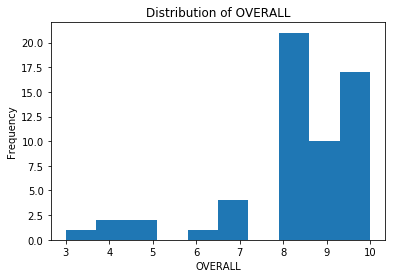

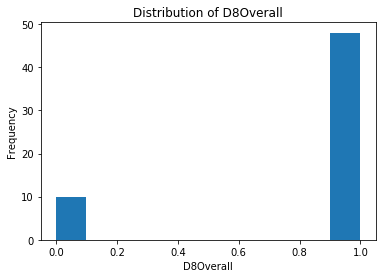

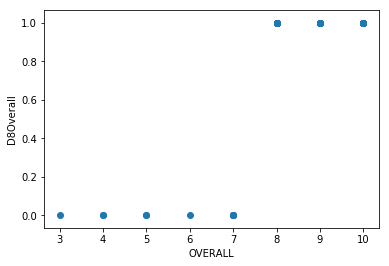

In [12]:
plt.subplot()
bs= 10

plt.hist(df['OVERALL'],bins= bs)

plt.title ('Distribution of OVERALL')
plt.xlabel('OVERALL')
plt.ylabel('Frequency')

plt.show()

plt.subplot()
plt.hist(df['D8Overall'], bins= bs)

plt.title ('Distribution of D8Overall')
plt.xlabel('D8Overall')
plt.ylabel('Frequency')

plt.show()

plt.subplot()
plt.scatter(df['OVERALL'], df['D8Overall'])
plt.xlabel('OVERALL')
plt.ylabel('D8Overall')

plt.show()

2. Test whether Overall is independent of WTE. Also test whether Overall is independent of
Size, Revenue, Years, and Numprod. Discuss your findings.

In [13]:
def dependency_test_1d(df, col, array, alpha= 0.05):
    # Returns the results of dependency tests for array[0] and other columns listed in array
    # The function looks up prop and use an appropriate dependency test for different types of variables:
    # 1. If both variables are metric, the function returns correlation coefficient, a p-value (2-tailed), 
    #    along with a scatter plot
    # 2. If both variables are non-metric, the function returns the result of chi-squared test
    # 3. Else (one variable is metric and the other is non-metric), the function returns the means of the metric 
    #    variable in both non-metric variable, the p-value of the difference between two means (assuming equal 
    #    population variance), along with a boxplot
    #
    # Parameter df: the dataframe to be analyzed
    # Precondition: df is a dataframe
    #
    # Parameter col: column name (string) from df
    # Precondition: col is in df, if col is non-metric, col can only be binary
    #
    # Parameter array: an array contains column names in df, to be analyzed for dependency test
    # Precondition: array is a one-dimentional array, containing only the column names (string) from df
    #               if elements in array is non-metric, the elements can only be binary
    #
    # Parameter alpha: decision rule to reject the null hypothesis (default = 0.05)
    # Precondition: alpha is a float > 0 and < 1

    if prop[col] == 'non-metric':
        for a in range(0, len(array)):
            if prop[array[a]] == 'non-metric':
                table, results= rp.crosstab(df[col], df[array[a]], test= 'chi-square')
                p_value= results['results'][1]
                
                if p_value > alpha:
                    print('%s vs. %s: no relationship (fail to reject H0)' % (col, array[a]))
                else:
                    print('%s vs. %s: there is a relationship (reject H0)' % (col, array[a]))
                    
                print(results)
                print('\n')
                
            if prop[array[a]] == 'metric':
                array_col0= df[array[a]].loc[df[col] == 0]
                array_col1= df[array[a]].loc[df[col] == 1]
                t_stat, p_value= stats.ttest_ind(array_col0, array_col1) 
                
                if p_value > alpha:
                    print('%s vs. %s: no difference (fail to reject H0)' % (col, array[a]))
                else:
                    print('%s vs. %s: the difference is statistically significant (reject H0)' % (col, array[a]))
                    
                print('mean of %s when (%s = 0): %.3f' % (array[a], col, array_col0.mean()))             
                print('mean of %s when (%s = 1): %.3f' % (array[a], col, array_col1.mean()))    
                print('p-value of the difference: %.3f' % p_value)
                
                plt.subplot()
                sns.boxplot(x= col, y= array[a], data= df)
                #plt.boxplot([array_col0, array_col1])
                #plt.xticks([1,2],['0','1'])
                #plt.xlabel(col)
                #plt.ylabel(array[a])
                plt.show()
                
    if prop[col] == 'metric':
        for a in range(0, len(array)):
            if prop[array[a]] == 'non-metric':
                array_col0= df[col].loc[df[array[a]] == 0]
                array_col1= df[col].loc[df[array[a]] == 1]
                t_stat, p_value= stats.ttest_ind(array_col0, array_col1) 
                
                if p_value > alpha:
                    print('%s vs. %s: no difference (fail to reject H0)' % (col, array[a]))
                else:
                    print('%s vs. %s: the difference is statistically significant (reject H0)' % (col, array[a]))  
                    
                print('mean of %s when (%s = 0): %.3f' % (col, array[a], array_col0.mean()))             
                print('mean of %s when (%s = 1): %.3f' % (col, array[a], array_col1.mean()))    
                print('p-value of the difference: %.3f' % p_value)
               
                plt.subplot()
                sns.boxplot(x= array[a], y= col, data= df)
                #plt.boxplot([array_col0, array_col1])
                #plt.xticks([1,2],['0','1'])
                #plt.xlabel(array[a])
                #plt.ylabel(col)
                plt.show()
                
            if prop[array[a]] == 'metric':
                corr, p_value= stats.pearsonr(df[col], df[array[a]])
                if p_value > alpha:
                    print('%s vs. %s: no correlation (fail to reject H0)' % (col, array[a]))
                else:
                    print('%s vs. %s: the correlation is statistically significant (reject H0)' % (col, array[a]))
                print('Correlation coefficent is: %.3f' % corr)
                print('p-value is: %.3f' % p_value)
                    
                plt.subplot()
                plt.scatter(df[col], df[array[a]])
                plt.xlabel(col)
                plt.ylabel(array[a])
                plt.show()

In [14]:
def dependency_test_2d(df, array1, array2, alpha= 0.05):
    # Returns the results of chi-squared tests for array1 X array2
    #
    # Parameter df: dataframe to be analyzed
    # Precondition: df is a dataframe
    #
    # Parameter array1: an array contains column names in df, to be analyzed for chi-squared test
    # Precondition: array1 is a one-dimentional array, containing only the column names (string) from df
    # 
    # Parameter array2: an array contains column names in df, to be analyzed for chi-squared test
    # Precondition: array2 is a one-dimentional array, containing only the column names (string) from df
    #
    # Parameter alpha: decision rule to reject the null hypothesis (default = 0.05)
    # Precondition: alpha is a float, and 0 < alpha < 1
    
    for a in range(0, len(array1)):
        dependency_test_1d(df, array1[a], array2, alpha)

OVERALL vs. WTE: no correlation (fail to reject H0)
Correlation coefficent is: 0.167
p-value is: 0.210


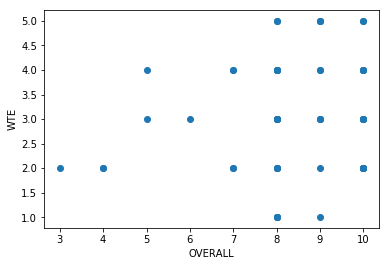

OVERALL vs. Size: no correlation (fail to reject H0)
Correlation coefficent is: -0.156
p-value is: 0.242


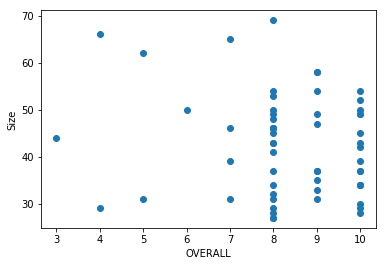

OVERALL vs. Revenue: no correlation (fail to reject H0)
Correlation coefficent is: -0.143
p-value is: 0.284


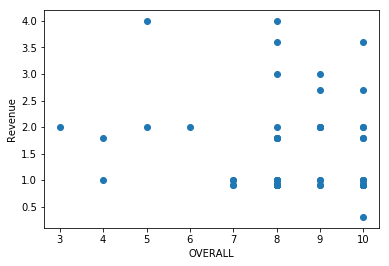

OVERALL vs. Years: no correlation (fail to reject H0)
Correlation coefficent is: -0.010
p-value is: 0.943


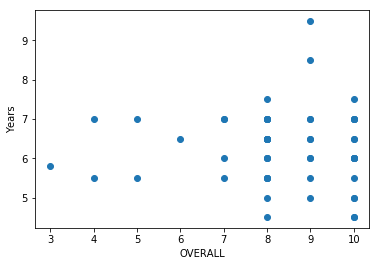

OVERALL vs. Numprod: no correlation (fail to reject H0)
Correlation coefficent is: -0.162
p-value is: 0.224


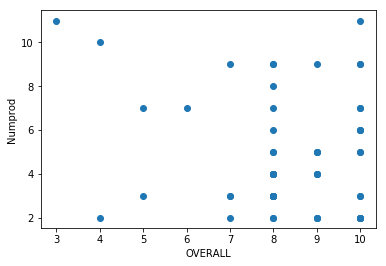

In [15]:
array2_1= ['WTE', 'Size', 'Revenue', 'Years', 'Numprod']
dependency_test_1d(df, 'OVERALL', array2_1)

3. Test whether D8Overall is independent of WTE. Also test whether D8Overall is independent
of Size, Revenue, Years, and Numprod. Discuss your findings.

D8Overall vs. WTE: no difference (fail to reject H0)
mean of WTE when (D8Overall = 0): 2.800
mean of WTE when (D8Overall = 1): 3.083
p-value of the difference: 0.491


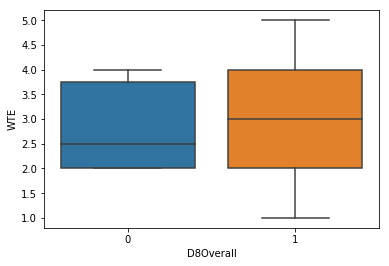

D8Overall vs. Size: no difference (fail to reject H0)
mean of Size when (D8Overall = 0): 46.300
mean of Size when (D8Overall = 1): 41.729
p-value of the difference: 0.222


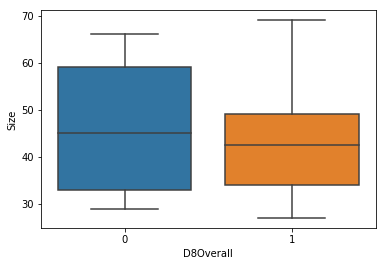

D8Overall vs. Revenue: no difference (fail to reject H0)
mean of Revenue when (D8Overall = 0): 1.660
mean of Revenue when (D8Overall = 1): 1.523
p-value of the difference: 0.654


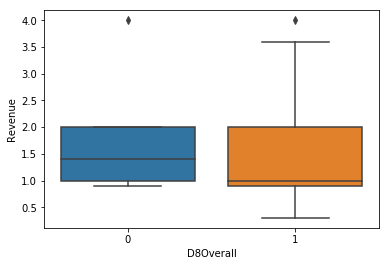

D8Overall vs. Years: no difference (fail to reject H0)
mean of Years when (D8Overall = 0): 6.280
mean of Years when (D8Overall = 1): 6.281
p-value of the difference: 0.997


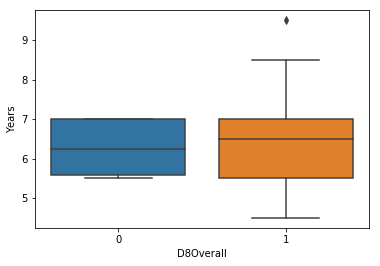

D8Overall vs. Numprod: no difference (fail to reject H0)
mean of Numprod when (D8Overall = 0): 5.700
mean of Numprod when (D8Overall = 1): 4.646
p-value of the difference: 0.249


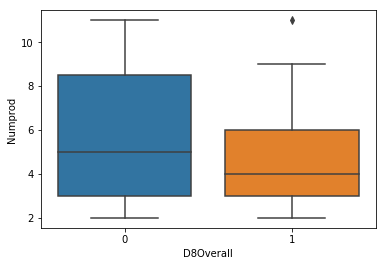

In [16]:
array3_1= ['WTE', 'Size', 'Revenue', 'Years', 'Numprod']
dependency_test_1d(df, 'D8Overall', array3_1)

4. Compute the mean of 19 variables starting from Q1 to IN3 in the survey. Discuss your
findings.

In [17]:
variables= df.iloc[:, df.columns.get_loc('Q1'):df.columns.get_loc('IN3')+1]
variables.head()

,Q1,Q2,Q3,Q4,TS1,TS2,TS3,SM1,SM2,SD1,SD2,SD3,SD4,SD5,SD6,SD7,IN1,IN2,IN3
0,8.0,8.0,5.0,9.0,7.0,6.0,6.0,7.0,6.0,9.0,9.0,7.0,7.0,6.0,9.0,9.0,8.0,6.0,6.0
1,9.0,9.0,9.0,9.0,10.0,10.0,10.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,10.0,9.0,9.0,9.0
2,10.0,4.0,2.0,7.0,7.0,7.0,5.0,8.0,8.0,10.0,10.0,10.0,10.0,8.0,10.0,5.0,7.0,2.0,8.0
3,8.0,8.0,10.0,10.0,5.0,3.0,5.0,7.0,7.0,9.0,9.0,5.0,5.0,8.0,10.0,9.0,1.0,1.0,1.0
4,9.0,9.0,7.0,9.0,7.0,9.0,8.0,7.0,7.0,8.0,8.0,9.0,9.0,8.0,9.0,10.0,8.0,7.0,8.0


In [18]:
variables.describe()

,Q1,Q2,Q3,Q4,TS1,TS2,TS3,SM1,SM2,SD1,SD2,SD3,SD4,SD5,SD6,SD7,IN1,IN2,IN3
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,8.448276,8.551724,8.137931,8.637931,7.862069,8.189655,8.224138,8.293103,7.948276,8.672414,8.775862,8.189655,8.189655,8.275862,9.000000,9.017241,7.224138,7.431034,7.931034
std,1.230781,1.512201,1.549740,1.150107,1.810770,1.648571,1.533750,1.991285,2.258880,1.160580,1.060339,1.721453,1.711231,1.598169,1.008734,1.177142,2.449798,2.256469,1.936375
min,5.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,1.000000,1.000000,5.000000,5.000000,1.000000,3.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000
25%,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,6.250000,7.000000,8.000000
50%,8.000000,9.000000,8.000000,9.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,8.000000,9.000000,9.000000,8.000000,8.000000,8.000000
75%,9.000000,10.000000,9.000000,10.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.750000,10.000000,9.000000,9.750000,9.000000,10.000000,10.000000,9.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [23]:
variables_mean= variables.mean()
variables_mean

Q1     8.448276
Q2     8.551724
Q3     8.137931
Q4     8.637931
TS1    7.862069
TS2    8.189655
TS3    8.224138
SM1    8.293103
SM2    7.948276
SD1    8.672414
SD2    8.775862
SD3    8.189655
SD4    8.189655
SD5    8.275862
SD6    9.000000
SD7    9.017241
IN1    7.224138
IN2    7.431034
IN3    7.931034
dtype: float64

5. Among 19 variables starting from Q1 to IN3 in the survey, which variable has the lowest
mean? Test whether Overall is independent of the variable with the lowest mean. Also create
an indicator variable for the variable with the lowest mean: If the value of that variable is
greater than or equal to 8, D8Lowest = 1, otherwise D8Lowest = 0. Test whether Overall (and
D8Overall) is independent of D8Lowest. Discuss your findings.

In [24]:
Lowest= variables_mean.idxmin()
Lowest

'IN1'

In [21]:
dichotomize(df, Lowest, 8, name= 'Lowest')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,WTE,Expint3,Expint2,Size,Revenue,Years,Numprod,Q1,Q2,Q3,...,SD4,SD5,SD6,SD7,IN1,IN2,IN3,OVERALL,D8Overall,D8Lowest
0,5.0,3.0,1.0,54.0,4.0,6.5,7.0,8.0,8.0,5.0,...,7.0,6.0,9.0,9.0,8.0,6.0,6.0,8.0,1,1
1,3.0,2.0,0.0,45.0,2.0,6.0,6.0,9.0,9.0,9.0,...,9.0,9.0,8.0,10.0,9.0,9.0,9.0,10.0,1,1
2,2.0,1.0,0.0,44.0,2.0,5.8,11.0,10.0,4.0,2.0,...,10.0,8.0,10.0,5.0,7.0,2.0,8.0,3.0,0,0
3,4.0,3.0,1.0,46.0,1.0,7.0,3.0,8.0,8.0,10.0,...,5.0,8.0,10.0,9.0,1.0,1.0,1.0,7.0,0,0
4,5.0,3.0,1.0,46.0,3.0,6.5,8.0,9.0,9.0,7.0,...,9.0,8.0,9.0,10.0,8.0,7.0,8.0,8.0,1,1


OVERALL vs. IN1: the correlation is statistically significant (reject H0)
Correlation coefficent is: 0.568
p-value is: 0.000


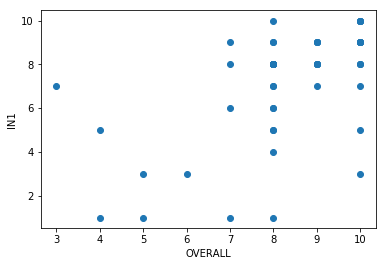

OVERALL vs. D8Lowest: the difference is statistically significant (reject H0)
mean of OVERALL when (D8Lowest = 0): 7.200
mean of OVERALL when (D8Lowest = 1): 8.921
p-value of the difference: 0.000


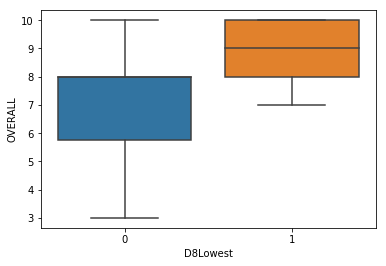

D8Overall vs. IN1: the difference is statistically significant (reject H0)
mean of IN1 when (D8Overall = 0): 4.400
mean of IN1 when (D8Overall = 1): 7.812
p-value of the difference: 0.000


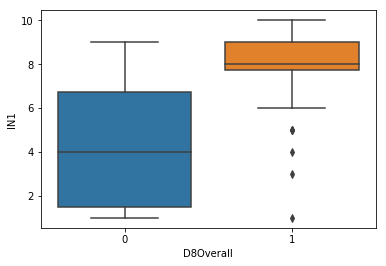

D8Overall vs. D8Lowest: there is a relationship (reject H0)
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   11.0811
1                    p-value =    0.0009
2               Cramer's phi =    0.4371




In [25]:
array5_1= ['OVERALL', 'D8Overall']
array5_2= [Lowest, 'D8Lowest']

dependency_test_2d(df, array5_1, array5_2)

6. Among 19 variables starting from Q1 to IN3 in the survey, which variable has the highest
mean? Test whether Overall is independent of the variable with the highest mean. Also
create an indicator variable for the variable with the highest mean: If the value of that variable
is greater than or equal to 8, D8Highest = 1, otherwise D8Highest = 0. Test whether Overall
(D8Overall) is independent of D8Highest. Discuss your findings.

In [27]:
Highest= variables_mean.idxmax()
Highest

'SD7'

In [28]:
dichotomize(df, Highest, 8, name= 'Highest')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,WTE,Expint3,Expint2,Size,Revenue,Years,Numprod,Q1,Q2,Q3,...,SD5,SD6,SD7,IN1,IN2,IN3,OVERALL,D8Overall,D8Lowest,D8Highest
0,5.0,3.0,1.0,54.0,4.0,6.5,7.0,8.0,8.0,5.0,...,6.0,9.0,9.0,8.0,6.0,6.0,8.0,1,1,1
1,3.0,2.0,0.0,45.0,2.0,6.0,6.0,9.0,9.0,9.0,...,9.0,8.0,10.0,9.0,9.0,9.0,10.0,1,1,1
2,2.0,1.0,0.0,44.0,2.0,5.8,11.0,10.0,4.0,2.0,...,8.0,10.0,5.0,7.0,2.0,8.0,3.0,0,0,0
3,4.0,3.0,1.0,46.0,1.0,7.0,3.0,8.0,8.0,10.0,...,8.0,10.0,9.0,1.0,1.0,1.0,7.0,0,0,1
4,5.0,3.0,1.0,46.0,3.0,6.5,8.0,9.0,9.0,7.0,...,8.0,9.0,10.0,8.0,7.0,8.0,8.0,1,1,1


OVERALL vs. SD7: the correlation is statistically significant (reject H0)
Correlation coefficent is: 0.485
p-value is: 0.000


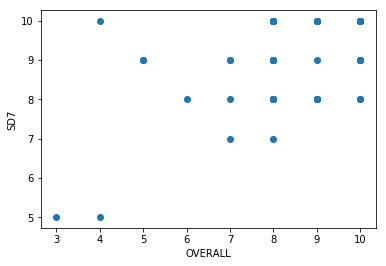

OVERALL vs. D8Highest: the difference is statistically significant (reject H0)
mean of OVERALL when (D8Highest = 0): 5.500
mean of OVERALL when (D8Highest = 1): 8.537
p-value of the difference: 0.000


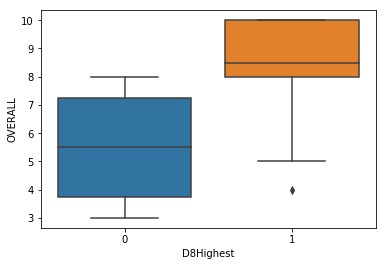

D8Overall vs. SD7: the difference is statistically significant (reject H0)
mean of SD7 when (D8Overall = 0): 7.900
mean of SD7 when (D8Overall = 1): 9.250
p-value of the difference: 0.001


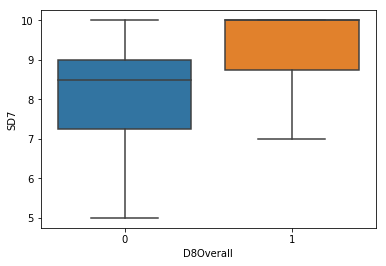

D8Overall vs. D8Highest: there is a relationship (reject H0)
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   10.0448
1                    p-value =    0.0015
2               Cramer's phi =    0.4162




In [29]:
array6_1= ['OVERALL', 'D8Overall']
array6_2= [Highest, 'D8Highest']

dependency_test_2d(df, array6_1, array6_2)